In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import requests

In [2]:
start = datetime.date(2017,1,1)
end = datetime.date(2020,7,2)

url = 'https://api.coindesk.com/v1/bpi/historical/close.json'

response = requests.get(f'{url}?start={start:%Y-%m-%d}&end={end:%Y-%m-%d}')

response.json()['bpi']


{'2017-01-01': 997.6888,
 '2017-01-02': 1018.05,
 '2017-01-03': 1030.8175,
 '2017-01-04': 1129.87,
 '2017-01-05': 1005.815,
 '2017-01-06': 895.67,
 '2017-01-07': 905.17,
 '2017-01-08': 913.5238,
 '2017-01-09': 899.35,
 '2017-01-10': 904.7925,
 '2017-01-11': 775.9813,
 '2017-01-12': 802.8288,
 '2017-01-13': 826.1213,
 '2017-01-14': 818.6388,
 '2017-01-15': 822.4225,
 '2017-01-16': 830.2638,
 '2017-01-17': 904.4538,
 '2017-01-18': 884.2513,
 '2017-01-19': 898.0213,
 '2017-01-20': 891.6238,
 '2017-01-21': 920.0113,
 '2017-01-22': 925.3313,
 '2017-01-23': 912.6875,
 '2017-01-24': 885.6475,
 '2017-01-25': 894.11,
 '2017-01-26': 915.1,
 '2017-01-27': 918.5625,
 '2017-01-28': 920.28,
 '2017-01-29': 914.0438,
 '2017-01-30': 920.2413,
 '2017-01-31': 967.6675,
 '2017-02-01': 987.3463,
 '2017-02-02': 1007.795,
 '2017-02-03': 1018.1113,
 '2017-02-04': 1033.6525,
 '2017-02-05': 1013.9938,
 '2017-02-06': 1024.6125,
 '2017-02-07': 1052.5388,
 '2017-02-08': 1054.3438,
 '2017-02-09': 988.9475,
 '2017-0

In [3]:
df = pd.DataFrame(response.json())

df = df.loc['2017-01-01':'2020-07-02'][['bpi']]
df.head()

,bpi
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [4]:
df.rename(columns={'bpi':'Price'}, inplace=True)
df.head()

,Price
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [5]:
df = df.reset_index()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1279 non-null   object 
 1   Price   1279 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


In [7]:
df['index'] = pd.to_datetime(df['index'])
df.head()

,index,Price
0,2017-01-01,997.6888
1,2017-01-02,1018.0500
2,2017-01-03,1030.8175
3,2017-01-04,1129.8700
4,2017-01-05,1005.8150


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1279 non-null   datetime64[ns]
 1   Price   1279 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.1 KB


In [9]:
df = df.rename(columns={'index':'Date'})

In [10]:
df.set_index('Date', inplace=True)
df.head()

,Price
Date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


<AxesSubplot: xlabel='Date'>

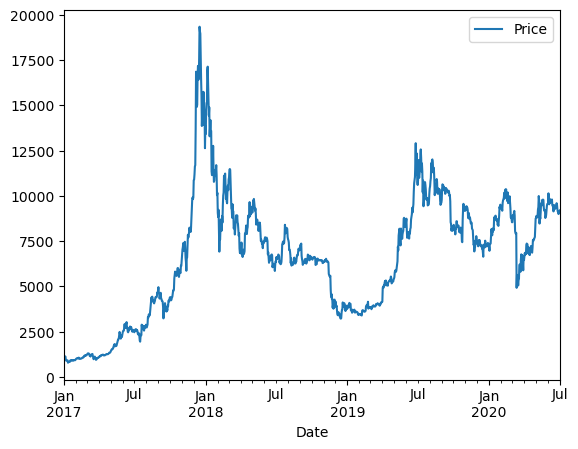

In [11]:
df.plot()

In [12]:
df.resample('q').mean()

,Price
Date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


<AxesSubplot: xlabel='Date'>

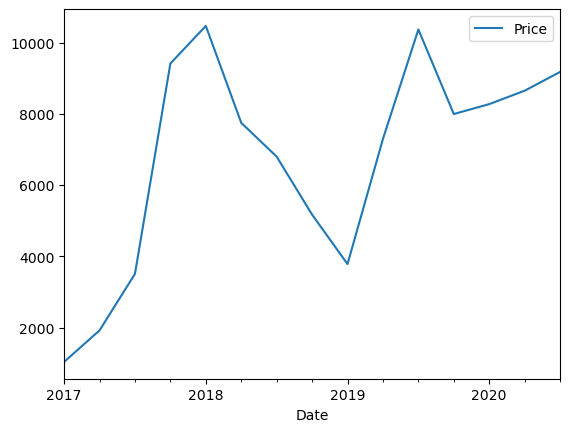

In [13]:
df.resample('q').mean().plot()

In [14]:
df.resample('m').mean()

,Price
Date,
2017-01-31,911.259258
2017-02-28,1064.382100
2017-03-31,1129.790194
2017-04-30,1218.319247
2017-05-31,1884.280513
2017-06-30,2657.555067
2017-07-31,2533.259458
2017-08-31,3914.709377
2017-09-30,4090.707313


<AxesSubplot: xlabel='Date'>

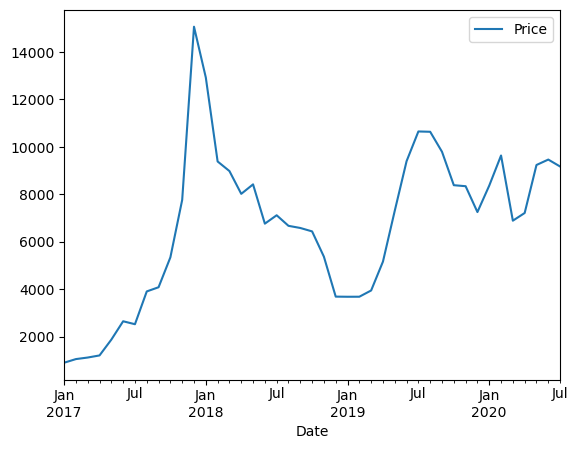

In [15]:
df.resample('m').mean().plot()

In [16]:
df[:5]

,Price
Date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [17]:
df[:5].diff()

,Price
Date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [18]:
df[:5].diff(2)

,Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


<AxesSubplot: xlabel='Date'>

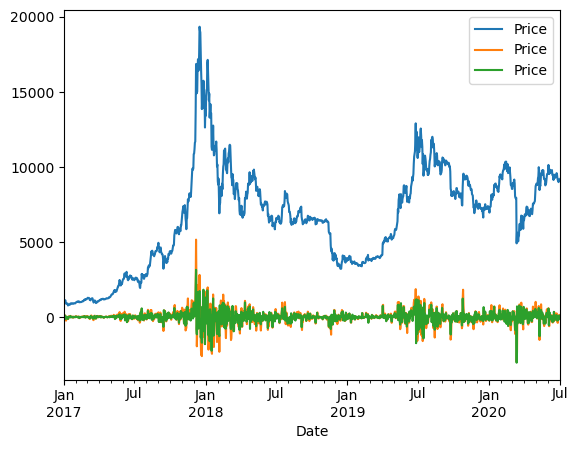

In [19]:
pd.concat([df['Price'], df['Price'].diff(2), df['Price'].diff()], axis=1).plot()

In [20]:
df[:5]

,Price
Date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [21]:
df[:5].shift()

,Price
Date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [22]:
df[:5].shift(2)

,Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175


In [23]:
df[:5].tshift()

C:\Users\equipo\AppData\Local\Temp\ipykernel_7884\4217940774.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df[:5].tshift()


,Price
Date,
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700
2017-01-06,1005.8150


In [24]:
df[:5] - df[:5].shift()

,Price
Date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


<AxesSubplot: xlabel='Date'>

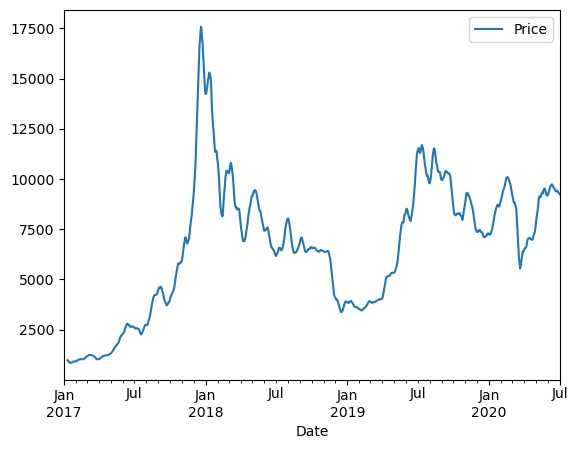

In [25]:
df.rolling(window=10).mean().plot()

<AxesSubplot: xlabel='Date'>

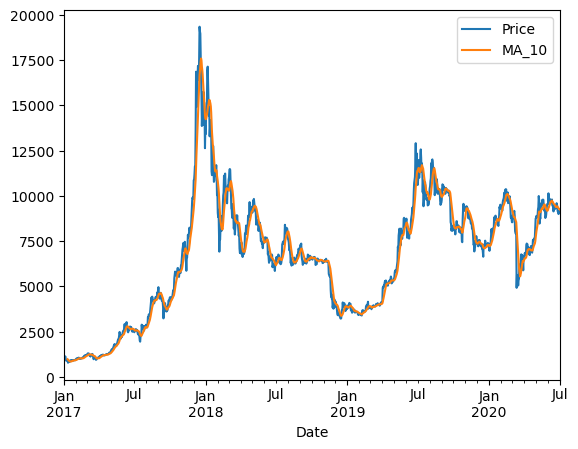

In [26]:
df['MA_10'] = df.rolling(window=10).mean()
df.plot()

<AxesSubplot: xlabel='Date'>

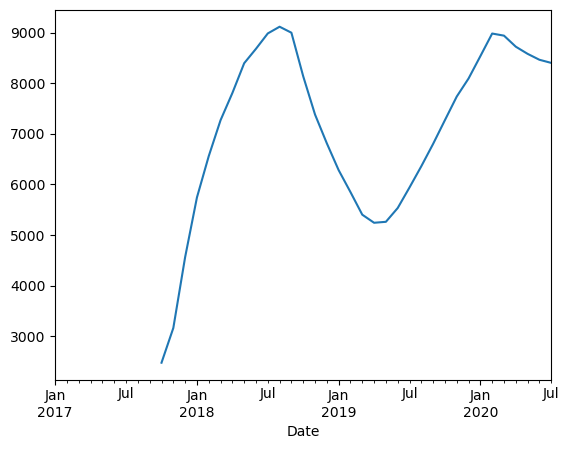

In [27]:
df['Price'].resample('m').mean().rolling(window=10).mean().plot()

<AxesSubplot: xlabel='Date'>

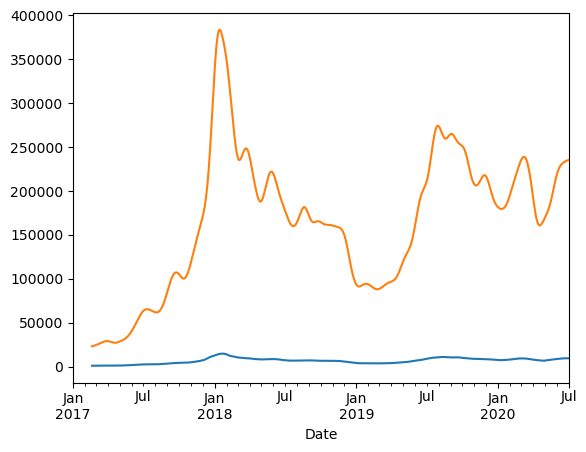

In [28]:
df['Price'].rolling(window=50).mean().plot()
df['Price'].rolling(window=50, win_type='gaussian').sum(std=10).plot()

<AxesSubplot: xlabel='Date'>

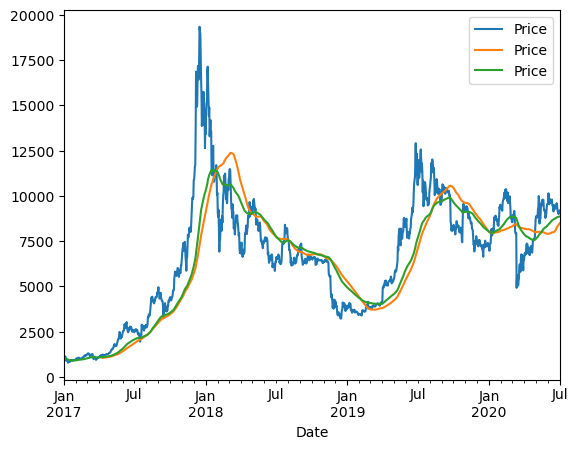

In [29]:
pd.concat([df['Price'], df['Price'].rolling(window=100).mean(), df['Price'].ewm(span=100).mean()], axis=1).plot()

In [31]:
df.groupby(df.index.dayofweek).mean()

,Price,MA_10
Date,,
0,6612.779266,6637.993279
1,6612.821919,6612.050515
2,6615.719704,6619.115465
3,6595.242466,6621.797389
4,6621.517746,6614.490403
5,6636.877807,6622.774455
6,6588.415989,6631.234977


In [32]:
df.groupby(df.index.month).mean()

,Price,MA_10
Date,,
1,6474.960095,6975.477448
2,5979.032653,5986.251085
3,5241.117152,5429.672180
4,5408.169478,5229.312700
5,6715.698325,6583.335918
6,7074.233533,6996.483809
7,6820.423568,6812.595684
8,7077.441969,7040.256088
9,6825.175222,6938.770511


In [45]:
df[['Price']][:5].cumsum()

,Price
Date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [46]:
df[['Price']][:5].pct_change()

,Price
Date,
2017-01-01,NaN
2017-01-02,0.020408
2017-01-03,0.012541
2017-01-04,0.096091
2017-01-05,-0.109796


In [47]:
df[['Price']][:5].pct_change(2)

,Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


In [49]:
df[['Price']][:5].expanding().sum()

,Price
Date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [50]:
df[['Price']][:5].expanding().mean()

,Price
Date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260


In [51]:
df[['Price']][:5]

,Price
Date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
